In [1]:
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_curve, auc

from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, classification_report

In [2]:
torch.set_printoptions(profile="full")

In [3]:
import torch.nn as nn

# Define model
class Perceptron(torch.nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.layer = torch.nn.Linear(input_size, 8)
        self.layer2 = torch.nn.Linear(8, 8)
        self.sigmoid = torch.nn.Sigmoid()
        self.layer3 = torch.nn.Linear(8, 1)
        self.sigmoid3 = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.layer(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        x = self.layer3(x)
        x = self.sigmoid3(x)
        return x

In [4]:
import torch
import torch.nn as nn

class BrokenPerceptron(nn.Module):
    def __init__(self, input_size):
        super(BrokenPerceptron, self).__init__()
        self.layer = nn.Linear(input_size, 1)
        self.layer2 = nn.Linear(1, 1)
        self.sigmoid = nn.Sigmoid()
        self.layer3 = nn.Linear(1, 1)
        self.sigmoid3 = nn.Sigmoid()
        self.layer4 = nn.Linear(1, 1)
        self.sigmoid4 = nn.Sigmoid()
        self.layer5 = nn.Linear(1, 1)
        self.sigmoid5 = nn.Sigmoid()
        self.layer6 = nn.Linear(1, 1)
        self.sigmoid6 = nn.Sigmoid()
        
    def forward(self, x):
        x = self.layer(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        x = self.layer3(x)
        x = self.sigmoid3(x)
        x = self.layer4(x)
        x = self.sigmoid4(x)
        x = self.layer5(x)
        x = self.sigmoid5(x)
        x = self.layer6(x)
        x = self.sigmoid6(x)
        return x


Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.22      0.35       100
         1.0       0.56      0.98      0.71       100

    accuracy                           0.60       200
   macro avg       0.74      0.60      0.53       200
weighted avg       0.74      0.60      0.53       200

Accuracy: 0.6000
F1 Score: 0.7101
ROC AUC: 0.5680


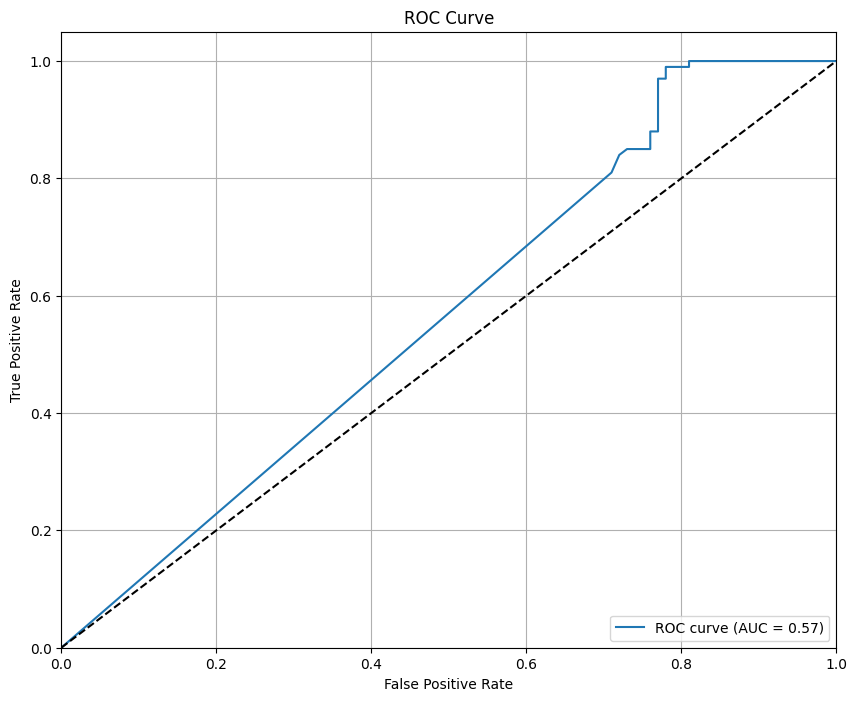

In [5]:
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

# Initialize model, loss, and optimizer
model = BrokenPerceptron(X_train.shape[1])
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 500
losses = []

for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), y_train)
    losses.append(loss.item())
    
    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Evaluation
model.eval()

with torch.no_grad():
    y_pred = model(X_test)
    y_pred_class = (y_pred.squeeze() > 0.5).float()
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_class)
    f1 = f1_score(y_test, y_pred_class)
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test.numpy(), y_pred.squeeze().numpy())
    roc_auc = auc(fpr, tpr)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_class))

    print(f'Accuracy: {accuracy:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')

    # Plot ROC curve
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

In [6]:
def compute_eigen_of_hessian(hessian):
    eigenvalues, _ = torch.linalg.eigh(hessian)
    return eigenvalues

In [7]:
def visualize_curvature(hessian):
    eigenvalues = compute_eigen_of_hessian(hessian)
    plt.plot(eigenvalues.detach().cpu().numpy())
    plt.title("Собственные значения Гессиана")
    plt.xlabel("Индекс")
    plt.ylabel("Собственное значение")
    plt.show()

In [8]:
from hessian.hessian import HessianCalculator

hc = HessianCalculator(model, criterion)

/home/maxim/git/net-arch-research/hessian/hessian.py:16: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.make_functional` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.func.functional_call` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  self.fmodel, self.params = make_functional(model)


tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.000

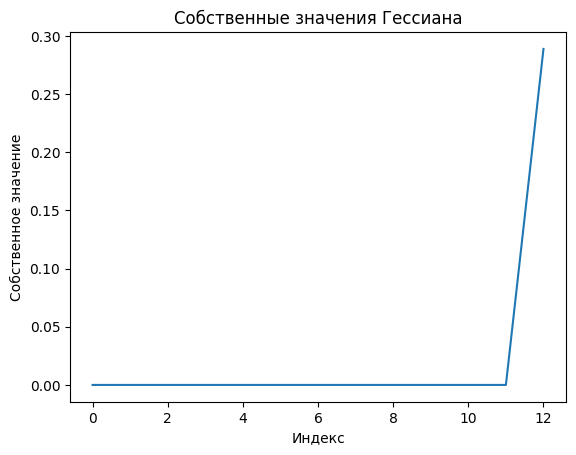

tensor([[ 9.1399e-19, -1.2076e-18,  9.6945e-19, -3.2644e-19, -1.1421e-19,
         -1.6715e-20, -4.9388e-12,  8.4165e-13,  2.6128e-11,  9.3187e-11,
          1.0053e-10, -3.3612e-10, -3.8433e-10],
        [-1.2076e-18,  1.5956e-18, -1.2809e-18,  4.3132e-19,  1.5090e-19,
          2.2084e-20,  6.5255e-12, -1.1120e-12, -3.4522e-11, -1.2312e-10,
         -1.3283e-10,  4.4410e-10,  5.0780e-10],
        [ 9.6945e-19, -1.2809e-18,  1.0283e-18, -3.4625e-19, -1.2114e-19,
         -1.7729e-20, -5.2385e-12,  8.9272e-13,  2.7713e-11,  9.8841e-11,
          1.0663e-10, -3.5651e-10, -4.0765e-10],
        [-3.2644e-19,  4.3132e-19, -3.4625e-19,  1.1659e-19,  4.0791e-20,
          5.9699e-21,  1.7640e-12, -3.0061e-13, -9.3320e-12, -3.3283e-11,
         -3.5906e-11,  1.2005e-10,  1.3727e-10],
        [-1.1421e-19,  1.5090e-19, -1.2114e-19,  4.0791e-20,  1.4271e-20,
          2.0886e-21,  6.1713e-13, -1.0517e-13, -3.2648e-12, -1.1644e-11,
         -1.2562e-11,  4.1999e-11,  4.8023e-11],
        [-1.671

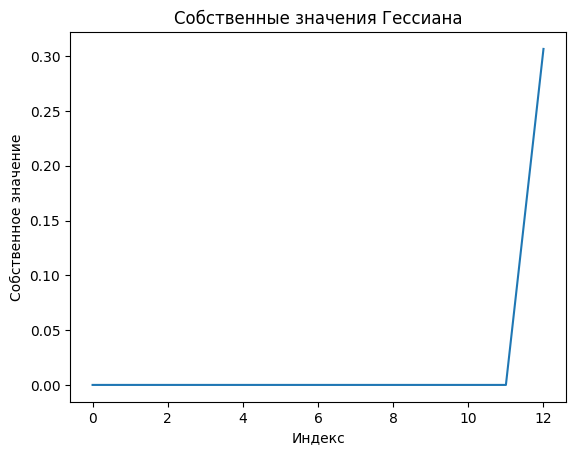

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.000

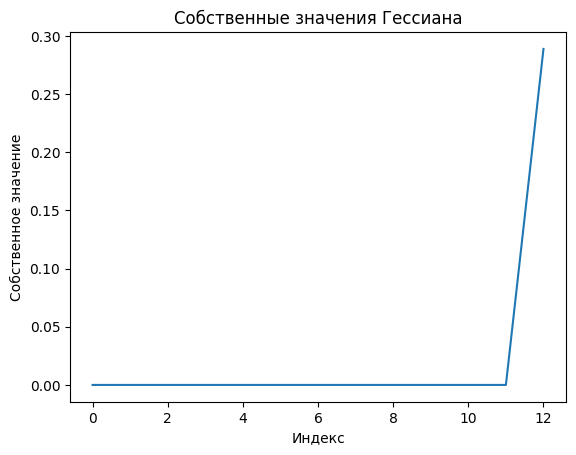

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.000

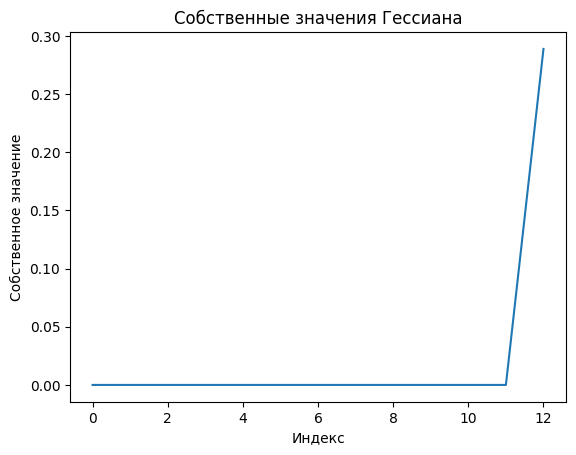

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.000

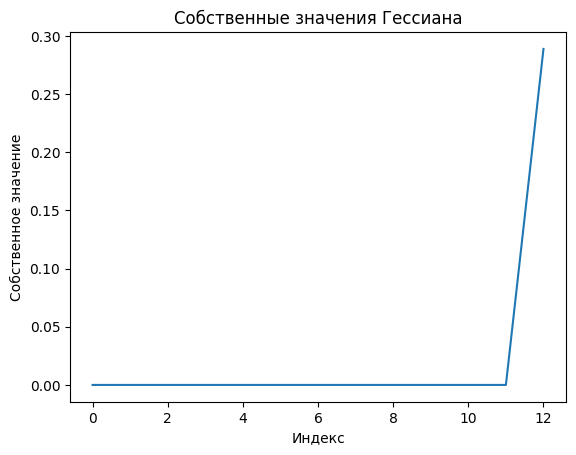

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.000

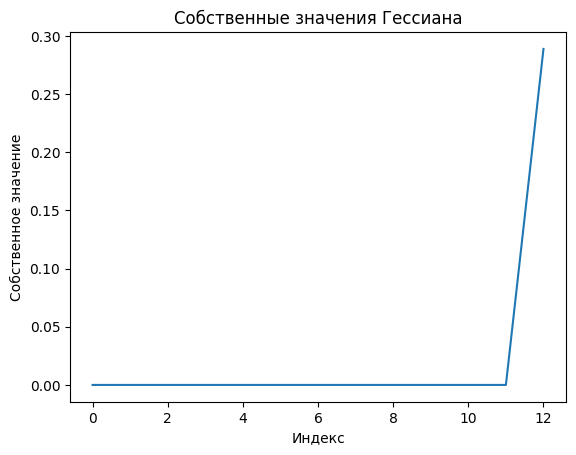

In [9]:
for i in range(len(X_train)):
    output = model(X_train[i])
    hessian = hc.hessian_wrt_params(X_train[i], output)
    print(hessian)
    print(compute_eigen_of_hessian(hessian))
    visualize_curvature(hessian)

    if i == 5:
        break

# ПО ВХОДУ

tensor([[0., 0.],
        [0., 0.]])
tensor([0., 0.])


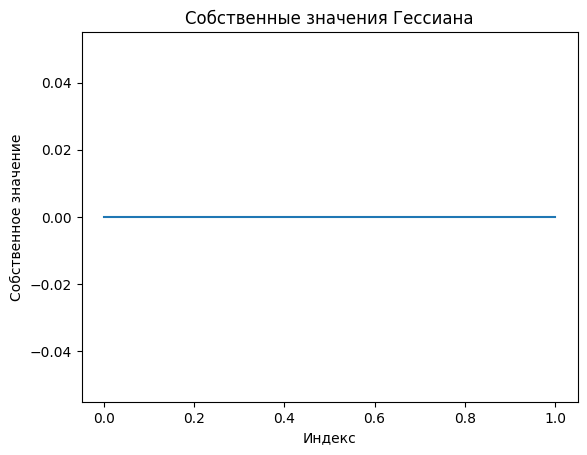

tensor([[ 7.1010e-19, -5.3281e-18],
        [-5.3281e-18,  3.9978e-17]])
tensor([-1.4893e-25,  4.0688e-17])


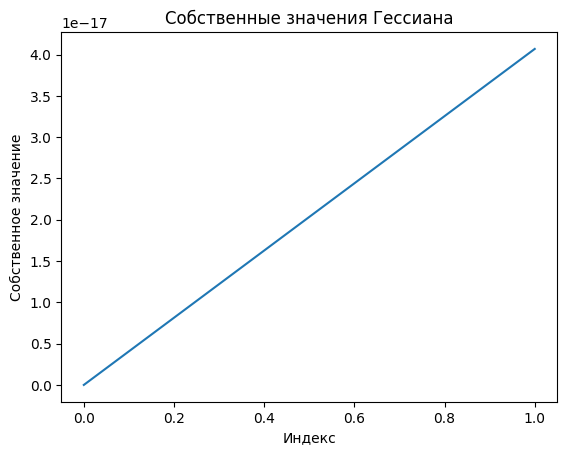

tensor([[0., 0.],
        [0., 0.]])
tensor([0., 0.])


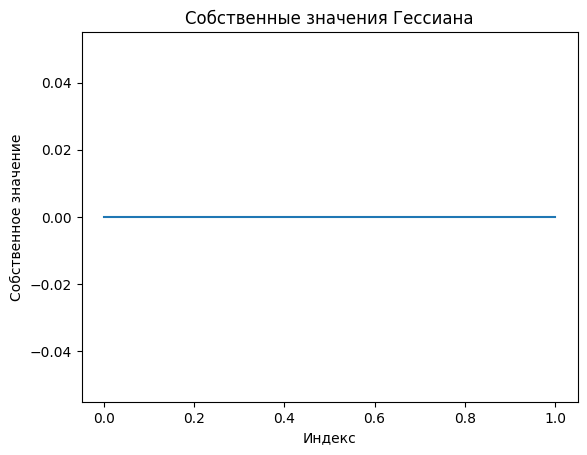

tensor([[0., 0.],
        [0., 0.]])
tensor([0., 0.])


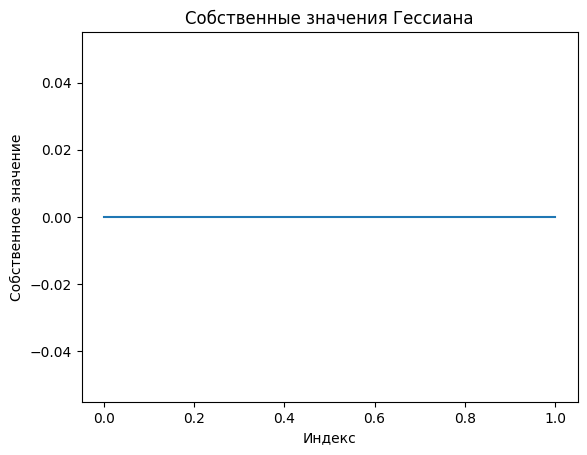

tensor([[0., 0.],
        [0., 0.]])
tensor([0., 0.])


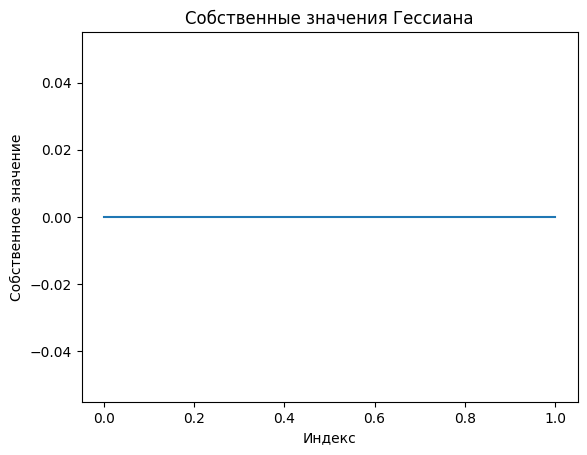

tensor([[0., 0.],
        [0., 0.]])
tensor([0., 0.])


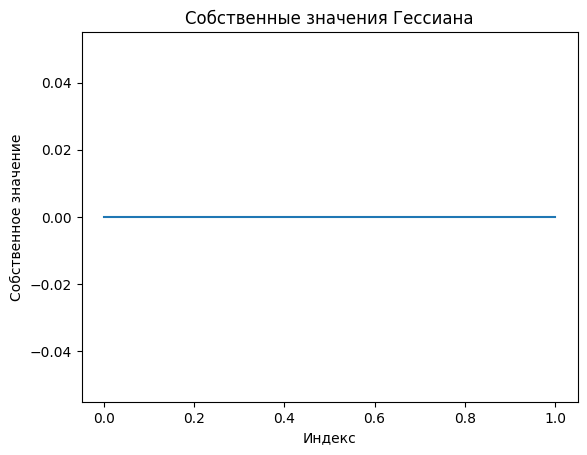

In [10]:
for i in range(len(X_train)):
    output = model(X_train[i])
    hessian = hc.hessian_wrt_inputs(X_train[i], output)
    print(hessian)
    print(compute_eigen_of_hessian(hessian))
    visualize_curvature(hessian)

    if i == 5:
        break

# ПО СЛОЯМ - ПАРАМЕТРЫ

In [11]:
from hessian.layer_wise_hessian import compute_local_hessians_for_chunks

hess = compute_local_hessians_for_chunks(model, X_train[i])

for name, i in hess.items():
    print(name, i)

0 tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
1 tensor([[0., 0.],
        [0., 0.]])
2 tensor([[-0.0285, -0.0285],
        [-0.0285, -0.0285]])
3 tensor([[0.0343, 0.0354],
        [0.0354, 0.0366]])
4 tensor([[0.0002, 0.0040],
        [0.0040, 0.0953]])
5 tensor([[-0.0012, -0.0061],
        [-0.0061, -0.0324]])
